In [1]:
import pyprob
from pyprob import Model
from pyprob.distributions import Normal

In [26]:
class GaussianUnknownMean(Model):
    def __init__(self, prior_mean=2., prior_stddev=0.1, likelihood_stddev=0.2):
        self.prior_mean = prior_mean
        self.prior_stddev = prior_stddev
        self.likelihood_stddev = likelihood_stddev
        super().__init__(name='GaussianUnknownMean')
        
        
    def forward(self):
        prior = Normal(self.prior_mean, self.prior_stddev)
        mu = pyprob.sample(prior)
        pyprob.tag(value = mu*5, name= 'computation')
        pyprob.sample(prior, name='mu2')
        likelihood = Normal(mu, self.likelihood_stddev)
        pyprob.observe(likelihood, name='obs')
        return mu
        

In [27]:
model = GaussianUnknownMean()

In [29]:
prior = model.prior_distribution(num_traces=500)
prior2 = model.prior_traces(num_traces=500)

Time spent  | Time remain.| Progress             | Trace   | Traces/sec
0d:00:00:00 | 0d:00:00:00 | #################### | 500/500 | 814.44       
Time spent  | Time remain.| Progress             | Trace   | Traces/sec
0d:00:00:00 | 0d:00:00:00 | #################### | 500/500 | 1,533.57       


In [39]:
# prior.plot_histogram()
prior2[0].named_variables['obs']


Variable(name:obs, control:False, replace:False, observable:True, observed:True, tagged:False, address:78__forward__?__Normal__1, distribution:Normal(mean:1.8215755224227905, stddev:0.20000000298023224), value:tensor(1.8298): log_prob:tensor(0.6897))

In [18]:
posterior = model.posterior_distribution(num_traces=500, observe={'obs':3})

Time spent  | Time remain.| Progress             | Trace   | Traces/sec
0d:00:00:00 | 0d:00:00:00 | #################### | 500/500 | 2,382.73       


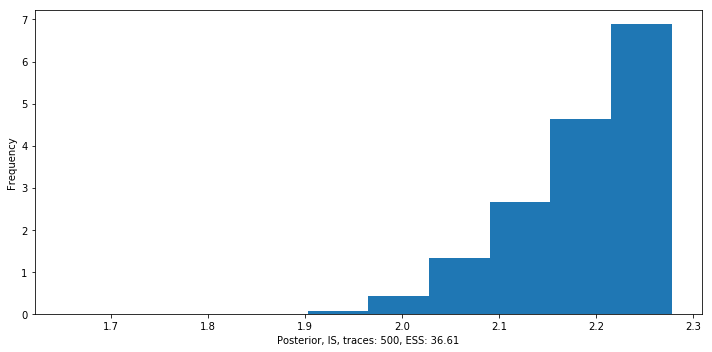

In [19]:
posterior.plot_histogram()